In [5]:
from google.colab import files
uploaded = files.upload()


Saving sales_data_analysis.csv to sales_data_analysis.csv


In [6]:
import pandas as pd

df = pd.read_csv("sales_data_analysis.csv")
df.head()


,Order_ID,Order_Date,Customer_Name,Region,Product,Quantity,Sales,Profit
0,10001,2023-01-01,Customer_1,East,Laptop,2,5933,6277
1,10002,2023-01-02,Customer_2,West,Laptop,2,34366,10424
2,10003,2023-01-03,Customer_3,North,Laptop,7,40364,6155
3,10004,2023-01-04,Customer_4,East,Monitor,1,19210,1583
4,10005,2023-01-05,Customer_5,East,Headphones,8,11939,13515


In [7]:
df.shape


(1000, 8)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order_ID       1000 non-null   int64 
 1   Order_Date     1000 non-null   object
 2   Customer_Name  1000 non-null   object
 3   Region         1000 non-null   object
 4   Product        1000 non-null   object
 5   Quantity       1000 non-null   int64 
 6   Sales          1000 non-null   int64 
 7   Profit         1000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


In [9]:
df.describe()


,Order_ID,Quantity,Sales,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,10500.500000,5.002000,24746.333000,6490.844000
std,288.819436,2.530692,14240.441648,5001.384926
min,10001.000000,1.000000,638.000000,-1947.000000
25%,10250.750000,3.000000,12267.250000,1926.250000
50%,10500.500000,5.000000,24317.000000,6676.000000
75%,10750.250000,7.000000,36943.500000,10782.750000
max,11000.000000,9.000000,49937.000000,14999.000000


In [10]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()
total_orders = df["Order_ID"].nunique()
avg_profit = df["Profit"].mean()

total_sales, total_profit, total_orders, avg_profit


(np.int64(24746333), np.int64(6490844), 1000, np.float64(6490.844))

In [11]:
region_summary = df.groupby("Region")[["Sales", "Profit"]].sum().reset_index()
region_summary


,Region,Sales,Profit
0,East,5865920,1542642
1,North,6153115,1588269
2,South,5799713,1640218
3,West,6927585,1719715


In [12]:
product_summary = (
    df.groupby("Product")[["Sales", "Profit"]]
    .sum()
    .sort_values(by="Sales", ascending=False)
)

product_summary


,Sales,Profit
Product,,
Laptop,5111600,1486865
Monitor,5056544,1348130
Tablet,5011808,1239068
Mobile,4997336,1347411
Headphones,4569045,1069370


In [13]:
loss_products = product_summary[product_summary["Profit"] < 0]
loss_products


,Sales,Profit
Product,,


In [14]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Month"] = df["Order_Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Sales"].sum()
monthly_sales


,Sales
Month,
2023-01,672593
2023-02,588159
2023-03,696163
2023-04,769448
2023-05,768692
2023-06,803573
2023-07,737189
2023-08,780531
2023-09,682248


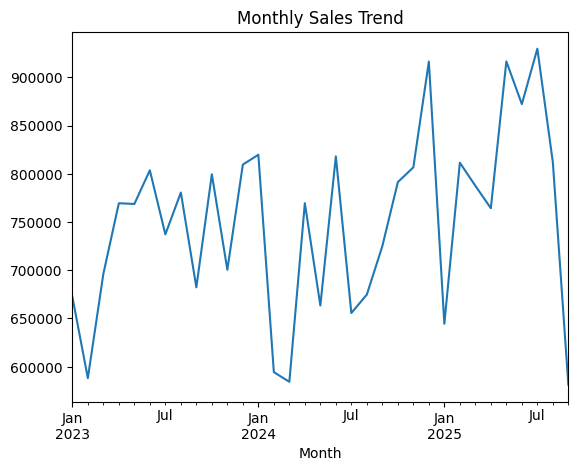

In [15]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind="line", title="Monthly Sales Trend")
plt.show()


In [16]:
df.isnull().sum()


,0
Order_ID,0
Order_Date,0
Customer_Name,0
Region,0
Product,0
Quantity,0
Sales,0
Profit,0
Month,0


In [17]:
df.duplicated().sum()


np.int64(0)

In [18]:
top_customers = (
    df.groupby("Customer_Name")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_customers


,Sales
Customer_Name,
Customer_97,49937
Customer_883,49929
Customer_98,49916
Customer_289,49853
Customer_233,49834
Customer_350,49646
Customer_784,49631
Customer_405,49614
Customer_169,49568


In [19]:
region_aov = df.groupby("Region")["Sales"].mean()
region_aov


,Sales
Region,
East,25284.137931
North,23849.282946
South,25216.143478
West,24741.375000


In [20]:
product_qty = df.groupby("Product")["Quantity"].sum()
product_qty


,Quantity
Product,
Headphones,862
Laptop,1033
Mobile,1011
Monitor,1106
Tablet,990


In [21]:
df["Profit_Margin_%"] = (df["Profit"] / df["Sales"]) * 100
df[["Sales", "Profit", "Profit_Margin_%"]].head()


,Sales,Profit,Profit_Margin_%
0,5933,6277,105.798079
1,34366,10424,30.332305
2,40364,6155,15.248736
3,19210,1583,8.240500
4,11939,13515,113.200436


In [22]:
high_profit = df[df["Profit_Margin_%"] > 20]
low_profit = df[df["Profit_Margin_%"] < 0]

high_profit.shape, low_profit.shape


((596, 10), (128, 10))

<Axes: title={'center': 'Sales by Product'}, xlabel='Product'>

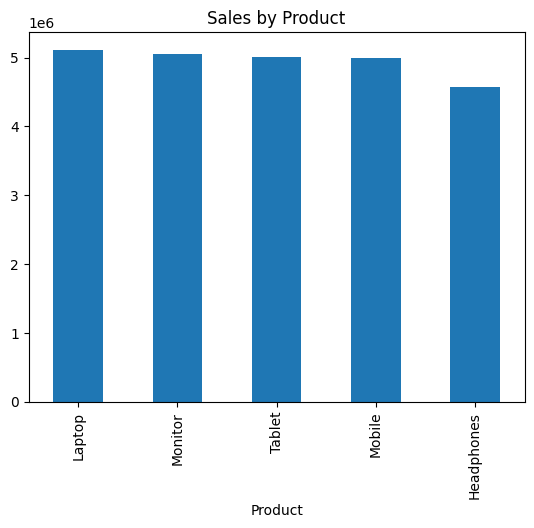

In [23]:
product_summary["Sales"].plot(kind="bar", title="Sales by Product")


In [25]:
df["Month"] = df["Month"].astype(str)


In [26]:
import sqlite3

conn = sqlite3.connect("sales.db")
df.to_sql("sales", conn, if_exists="replace", index=False)

print("Table created successfully ✅")


Table created successfully ✅


In [27]:
df_sql = df.drop(columns=["Month"])


In [28]:
pd.read_sql("SELECT COUNT(*) FROM sales", conn)


,COUNT(*)
0,1000


In [29]:
pd.read_sql("SELECT COUNT(*) AS total_rows FROM sales", conn)


,total_rows
0,1000


In [33]:
pd.read_sql("""
SELECT Product,
       SUM(Sales) AS Total_Sales
FROM sales
GROUP BY Product
ORDER BY Total_Sales DESC
LIMIT 5;
""", conn)


,Product,Total_Sales
0,Laptop,5111600
1,Monitor,5056544
2,Tablet,5011808
3,Mobile,4997336
4,Headphones,4569045


In [34]:
pd.read_sql("""
SELECT Region,
       SUM(Profit) AS Total_Profit
FROM sales
GROUP BY Region;
""", conn)


,Region,Total_Profit
0,East,1542642
1,North,1588269
2,South,1640218
3,West,1719715


In [35]:
pd.read_sql("""
SELECT strftime('%Y-%m', Order_Date) AS Month,
       SUM(Sales) AS Monthly_Sales
FROM sales
GROUP BY Month
ORDER BY Month;
""", conn)


,Month,Monthly_Sales
0,2023-01,672593
1,2023-02,588159
2,2023-03,696163
3,2023-04,769448
4,2023-05,768692
5,2023-06,803573
6,2023-07,737189
7,2023-08,780531
8,2023-09,682248
9,2023-10,799466
